# Employee Attrition

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

objective: prediksi faktor yang  mempengaruhi employee atrition

prediksi menggunakan Regresi Logistik

Data yang digunakan: 
    sumber: Kaggle.com
    nama dataset: IBM HR Analytics Employee Attrition & Performance

In [1]:
import pandas as pd
import numpy as np

In [18]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import plot_confusion_matrix

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

In [12]:
dataemployee = pd.read_csv('dataset/employeeatrition.csv')

In [14]:
dataemployee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [17]:
#cek missing data
dataemployee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [15]:
dataemployee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
dataemployee.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


Plot Data

In [19]:
data_agg = dataemployee.groupby(['Department']).agg(employee_count = pd.NamedAgg('EmployeeCount',np.sum))
data_agg

,employee_count
Department,
Human Resources,63
Research & Development,961
Sales,446


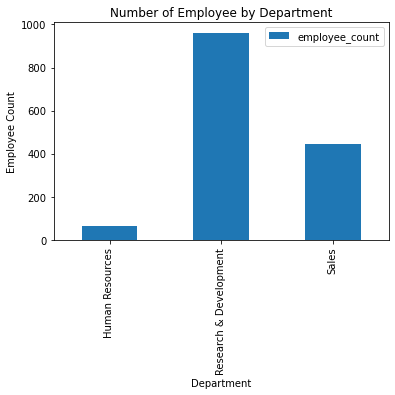

In [20]:
data_agg.plot(kind = 'bar')

# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

plt.xlabel('Department') # add to x-label to the plot
plt.ylabel('Employee Count') # add y-label to the plot
plt.title('Number of Employee by Department') # add title to the plot

plt.show()

[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'Distribution')]

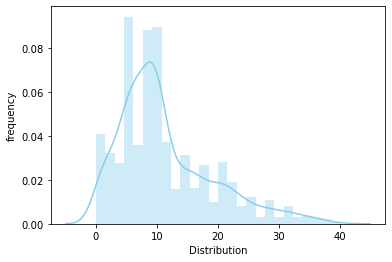

In [22]:
#Cek distribusi total working years
ax = sns.distplot(dataemployee['TotalWorkingYears'],color ='skyblue')
ax.set(xlabel='Distribution',ylabel='frequency')

In [23]:
dataemployee['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

Fitting Model

In [27]:
#preprocessing
x = dataemployee.drop ('Attrition', axis =1)
y = dataemployee['Attrition']

RANDOM_STATE = 9999

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state = RANDOM_STATE)

In [28]:
#preprocessing
numeric_features = x.drop(['EmployeeNumber'],axis=1).select_dtypes (include=['int64','float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline([
    ('scaler',StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('numerical', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
])

In [29]:
#model fitting
model = Pipeline(steps=[
    ('preprocess',preprocess),
    ('filter', VarianceThreshold()),
    ('model', LogisticRegression(random_state = RANDOM_STATE))
])
model.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', '...
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['B

In [30]:
x_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
494,34,Travel_Rarely,204,Sales,14,3,Technical Degree,1,666,3,...,4,80,2,8,3,3,8,2,0,6
840,35,Travel_Rarely,982,Research & Development,1,4,Medical,1,1172,4,...,2,80,1,10,2,3,8,0,1,7
1177,50,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,1656,4,...,3,80,3,19,3,3,14,11,1,11
475,26,Travel_Rarely,703,Sales,28,2,Marketing,1,641,1,...,4,80,2,6,5,4,5,3,1,4
773,36,Travel_Rarely,796,Research & Development,12,5,Medical,1,1073,4,...,2,80,0,15,2,2,14,8,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,23,Travel_Rarely,885,Research & Development,4,3,Medical,1,705,1,...,1,80,1,5,3,4,3,2,0,2
467,37,Non-Travel,142,Sales,9,4,Medical,1,626,1,...,4,80,1,9,6,3,9,5,7,7
529,38,Travel_Rarely,827,Research & Development,1,4,Life Sciences,1,724,2,...,3,80,0,10,4,2,9,7,1,8
861,46,Travel_Rarely,1402,Sales,2,3,Marketing,1,1204,3,...,1,80,0,28,2,3,26,15,15,9


In [31]:
model.predict(x_test)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', '

In [32]:
model.predict_proba(x_test)

array([[7.92218107e-01, 2.07781893e-01],
       [9.02784170e-01, 9.72158305e-02],
       [9.99243773e-01, 7.56227074e-04],
       [9.03973412e-01, 9.60265881e-02],
       [9.61697559e-01, 3.83024413e-02],
       [6.41882407e-01, 3.58117593e-01],
       [9.97287581e-01, 2.71241873e-03],
       [8.89395139e-01, 1.10604861e-01],
       [9.89502647e-01, 1.04973528e-02],
       [8.06029867e-01, 1.93970133e-01],
       [9.98215833e-01, 1.78416705e-03],
       [8.53080743e-01, 1.46919257e-01],
       [6.32960749e-01, 3.67039251e-01],
       [6.81480736e-01, 3.18519264e-01],
       [8.04777765e-01, 1.95222235e-01],
       [9.96699817e-01, 3.30018304e-03],
       [7.90611798e-01, 2.09388202e-01],
       [9.88898622e-01, 1.11013781e-02],
       [9.97157058e-01, 2.84294211e-03],
       [9.96611020e-01, 3.38897996e-03],
       [5.16027069e-01, 4.83972931e-01],
       [8.06327372e-01, 1.93672628e-01],
       [8.98749439e-01, 1.01250561e-01],
       [9.92848078e-01, 7.15192221e-03],
       [9.961392

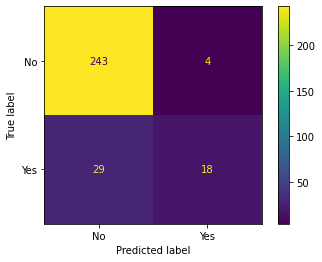

In [33]:
plot_confusion_matrix(model,x_test,y_test)

In [34]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.89      0.98      0.94       247
         Yes       0.82      0.38      0.52        47

    accuracy                           0.89       294
   macro avg       0.86      0.68      0.73       294
weighted avg       0.88      0.89      0.87       294



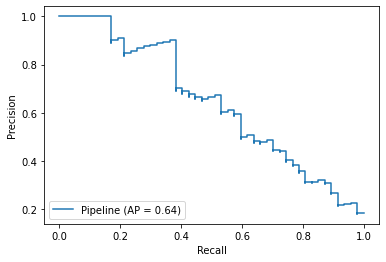

In [35]:
plot_precision_recall_curve(model,x_test,y_test)

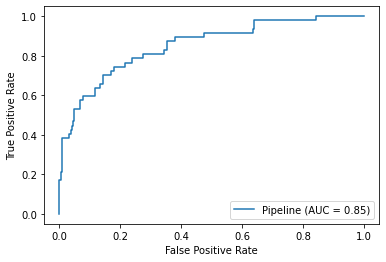

In [36]:
plot_roc_curve(model,x_test,y_test)

Kesimpulan

In [ ]:
Model prediksi memiliki akurasi yang tinggi dalam memprediksi employee attrition